# Calculating and Observing surface water Differences at Kızılırmak





In the project, first of all, Landsat images were used to produce the change of Kızılırmak River between 1985-2019 as a timelapse and an overview was presented.Then, the Image with the lowest cloudiness was selected using USGS Landsat 8 Surface Reflectance Tier 1 images. The reflection values and other properties of the selected image were examined.Since The Normalized Difference Water Index [ NDWI (Green, NIR) ] is widely and successfully used in surface water mass detection and mapping, it was decided to apply it to the selected image. After showing how the indexes were applied, 2 Landsat 8 Surface Reflectance Tier 1 images were selected according to the cloudiness ratio (when I ran the codes, I obtained the images dated 2017-07-13 and 2019-11-08) NDWI indexes were applied and then masked with the Thresholding method. Water pixels in different images were obtained. Pixels were converted from raster to vector data and their differences were calculated in km. The Kızılırmak River, which was 161 km in the image dated 2017-07-13, was calculated as 156 km in the image dated 2019-11-08. The change over the years was determined in km and displayed graphically.

In [629]:
import ee
import geemap
import os

# When starting the project, an interactive map was created first.

When the following code is run, the area boundaries to be studied will appear on the map, but the Kızılırmak region must be selected on the map using the Drawing tool.

In [563]:
Map = geemap.Map(center=[41, 35], zoom=9)
Map.add_basemap('HYBRID')
Map

Map(center=[41, 35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…


You should draw a rectangle that containts Kızılırmak.Thus, with the following 2 codes, the wrong band combination will be applied on the selected area and the change of Kızılırmak will be observed over the years.

In [564]:
Map.draw_last_feature

In [565]:
roi = Map.draw_last_feature

# For creating Landsat timelapse from 1985 to 2019 of Kızılırmak region,
NIR - SWIR1 - RED False-Color Band Combination is used for observing water dynamics with below code.

In [570]:
label = 'Surface water dynamics in Kızılırmak'
Map.add_landsat_ts_gif(label=label, start_year=1985, bands=['NIR', 'SWIR1', 'Red'], font_color='white', frames_per_second=6, progress_bar_color='blue')

Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\HP\Downloads\landsat_ts_bef.gif
Adding animated text to GIF ...
Adding GIF to the map ...
The timelapse has been added to the map.


# Selecting the best cloud-free image
USGS Landsat 8 Surface Reflectance Tier 1 images were used.

In [571]:
Map = geemap.Map()
Map.add_basemap('HYBRID')
Map.setCenter(34.87,41.24, 12)
Map


Map(center=[41.24, 34.87], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

 Placed a marker inside Kızılırmak and defined an ee.Geometry() as an ROI as shown below code.
 If you want to place a marker please switch roi = Map.user_roi
print(roi.getInfo()) code to roi = ee.Geometry.Point(34.858907, 41.264053) and place a mark on map

In [572]:
roi = ee.Geometry.Point(34.858907, 41.264053)

In [573]:
images = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate('2015-01-01', '2019-12-31') \
    .sort('CLOUD_COVER')

Images filtered the ImageCollection by roi and date, and then sort by cloud cover.

For Learning how many Landsat 8 images are available for the study area at the range 2015-2019 below code runned.

In [574]:
print(images.size().getInfo())

88


Since the returned images are already sorted by CLOUD_COVER in ascending order, the first image would be the best cloud-free image. After deciding which one is the best image, False color of Image (NIR-SWIR1-RED) added to the Map.

In [575]:
best_image = images.first().select(['B1', 'B2', 'B3', 'B4',  'B5', 'B6', 'B7'])


In [576]:
vis_params = {
  'bands': ['B5', 'B6', 'B4'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(best_image, vis_params, 'Best image')

# Getting image properties
Image properties were examined to check the pixel values and spectral signature. Also from Toolbar button on map, Plotting and Inspector informations of Image is taken into consideration.

In [577]:
print(best_image.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7641, 7761], 'crs': 'EPSG:32636', 'crs_transform': [30, 0, 577485, 0, -30, 4741515]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7641, 7761], 'crs': 'EPSG:32636', 'crs_transform': [30, 0, 577485, 0, -30, 4741515]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7641, 7761], 'crs': 'EPSG:32636', 'crs_transform': [30, 0, 577485, 0, -30, 4741515]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7641, 7761], 'crs': 'EPSG:32636', 'crs_transform': [30, 0, 577485, 0, -30, 4741515]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7641, 7761], 'crs': 'EPSG:32636', 'crs_transform': [30, 0, 5774

In [578]:
print(best_image.propertyNames().getInfo())

['IMAGE_QUALITY_TIRS', 'CLOUD_COVER', 'system:id', 'EARTH_SUN_DISTANCE', 'LANDSAT_ID', 'system:footprint', 'system:version', 'CLOUD_COVER_LAND', 'GEOMETRIC_RMSE_MODEL', 'SR_APP_VERSION', 'SATELLITE', 'SOLAR_AZIMUTH_ANGLE', 'IMAGE_QUALITY_OLI', 'WRS_PATH', 'system:time_start', 'SENSING_TIME', 'ESPA_VERSION', 'SOLAR_ZENITH_ANGLE', 'WRS_ROW', 'GEOMETRIC_RMSE_MODEL_Y', 'LEVEL1_PRODUCTION_DATE', 'GEOMETRIC_RMSE_MODEL_X', 'system:asset_size', 'PIXEL_QA_VERSION', 'system:index', 'system:bands', 'system:band_names']


In [579]:
print(best_image.get('system:id').getInfo())

LANDSAT/LC08/C01/T1_SR/LC08_176031_20170713


After learning parameters of Image and getting the system:id, its added to the Map again.

In [580]:
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_176031_20170713')
vis_params = {
  'bands': ['B5', 'B6', 'B4'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(image, vis_params, 'image')
Map

Map(bottom=392510.0, center=[41.24, 34.87], controls=(WidgetControl(options=['position', 'transparent_bg'], wi…

In [581]:
print(best_image.get('CLOUD_COVER').getInfo())

0.01


In [582]:
print(best_image.get('system:band_names').getInfo())

['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']


In [583]:
print(best_image.get('system:time_start').getInfo())

1499934029030


In [584]:
print(ee.Date(best_image.get('system:time_start')).format('YYYY-MM-dd').getInfo()) #Date of the chosen Image

2017-07-13


In [585]:
print("WRS_Path={}, WRS_ROW={}".format(best_image.get('WRS_PATH').getInfo(), best_image.get('WRS_ROW').getInfo()))

WRS_Path=176, WRS_ROW=31


# The Normalized Difference Water Index (NDWI)

It is widely used for monitoring changes on earth related to water content in water bodies on earth observations, It is formulated with green and NIR wavelengths.
                   Its formula : ( X(green) - X(NIR) ) / ( X(green) + X(NIR) )

In [588]:
Map = geemap.Map(center=[41, 35], zoom=9)
Map.add_basemap('HYBRID')
Map

Map(center=[41, 35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

Firstly, false color image of the area with chosen best image is showed with below code.

In [589]:
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_176031_20170713')
vis_params = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(image, vis_params, 'image')
Map.centerObject(image, 8)

Please first draw a rectangle on the False color Image that Kızılırmak in it to applying NDWI Index and after, run the below code

In [590]:
Map.draw_last_feature

In [591]:
rectangle = Map.draw_last_feature

And then, Normalized Difference Water Index is applied to the chosen rectangle clip of Image with math formula that applied on Green and NIR bands. Map is updated. In the resulting image, coloring is made and it is shown that the pixels represented in blue are water pixels.

In [592]:
ndwi_image = image.normalizedDifference(['B3', 'B5'])

In [593]:
vis_ndwi = {
    'min': -1, 
    'max': 1,
    'palette': ['#ece7f2', '#d0d1e6', '#a6bddb', '#74a9cf', '#3690c0', '#0570b0', '#045a8d', '#023858']
}
Map.addLayer(ndwi_image.clip(rectangle), vis_ndwi, 'NDWI image')

# Extracting Water pixels from Image that clipped

In [594]:
ndwi_threshold = 0  # Tresholding method is applied
water_image = ndwi_image.gt(ndwi_threshold).selfMask()  # Masking is done

In [595]:
Map.addLayer(water_image.clip(rectangle), {'palette': 'blue'}, 'Water image') #blue color is signed for water pixels.

In [596]:
Map.layers

(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms']),
 TileLayer(attribution='Google', name='Google Maps', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms'], url='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'),
 TileLayer(attribution='Google', name='Google Satellite', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms'], url='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}'),
 TileLayer(attribution='Google Earth Engine', name='image', options=['attribution', 'detect_retina', 'max_native_zoom', 'max_zoom', 'min_native_zoom', 'min_zoom', 'no_wrap', 'tile_size', 'tms'], url='https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps/35a1f0bfc712b4ab202ede54b4364a3f-568b1c131

In [597]:
water_layer = Map.layers[-1]

In [598]:
water_layer.interact(opacity=(0.0,1.0,0.1)) #with this code, opacity of water pixels are now adjustable

Box(children=(FloatSlider(value=1.0, description='opacity', max=1.0),))

In [599]:
Map

Map(bottom=49204.79998779297, center=[41.490474989030936, 35.36942231853624], controls=(WidgetControl(options=…

## Converting water pixels raster to vector from clipped area (Kızılırmak)
For calculating the area for obtained year


In [600]:
water_vector = water_image.clip(rectangle).reduceToVectors(scale=30, maxPixels=60000000) #raster to vector
Map.addLayer(water_vector, {}, 'Water vector') #show to map

In [601]:
kizilirmak = water_vector # defining vector area as Kızılırmak
Map.addLayer(kizilirmak, {}, 'Kızılırmak') #show

In [602]:
Map.addLayer(ee.Image().paint(kizilirmak, 0, 2), {'palette': 'blue'}, 'Kızılırmak Outline') #painting

In [603]:
area = kizilirmak.geometry().area(1).divide(1e6).round().getInfo() #calculating area of Kızılırmak
print("Area = {} km2".format(area)) #printing area

Area = 162 km2


# Applying Calculating Process to chosen 2 different images

For observing and calculating differences between two years of defined area (in this case Kızılırmak), we calculate the water pixels in km from two different Image and compare each other. 

In [604]:
Map = geemap.Map(center=[41, 35], zoom=9)
Map.add_basemap('HYBRID')
Map

Map(center=[41, 35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

First, Images with optimum cloudiness were obtained from USGS Landsat 8 Surface Reflectance Tier 1 images

In [605]:
roi = ee.Geometry.Point(34.858907, 41.264053)
start_date = '2015-01-01'
end_date = '2019-12-31'
cloud_threshold = 0.05
ndwi_threshold = 0

In [606]:
images = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
    .filterBounds(roi) \
    .filterDate(start_date, end_date) \
    .filterMetadata('CLOUD_COVER', 'less_than', cloud_threshold)

In [607]:
print(images.size().getInfo()) #learning how many images we have that meet the cloud cover criteria (in my case its 2)

2


In [608]:
print(images.aggregate_array('system:id').getInfo()) #learning system id of images and turning them into array for comparing easily

['LANDSAT/LC08/C01/T1_SR/LC08_176031_20170713', 'LANDSAT/LC08/C01/T1_SR/LC08_176031_20191108']


In [609]:
dates = images.aggregate_array('system:time_start').map(lambda d: ee.Date(d).format('YYYY-MM-dd'))
print(dates.getInfo()) #learning dates of Images and creating array (in my case its 2017-07-13 and 2019-11-08 )

['2017-07-13', '2019-11-08']


In [610]:
last_image = ee.Image.clip(images.toList(images.size()).get(1),rectangle) #clipping and getting second Image
vis_params = {
  'bands': ['B5', 'B4', 'B3'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}
Map.addLayer(last_image, vis_params, 'First image') #showing first image that clipped according to defined area on map
Map.centerObject(roi, 8)

In [611]:
def extract_water(img): # extracting water pixels from images by tresholding from ndwi index, because of my images in array, i defined a function
    
    ndwi_image = img.normalizedDifference(['B3', 'B5'])
    water_image = ndwi_image.gt(ndwi_threshold).selfMask()
    return water_image.clip(rectangle)

In [612]:
ndwi_images = images.map(extract_water) # applying ndwi index to chosen 2 images and getting extract water pixels

In [613]:
print(ndwi_images.size().getInfo()) # how many images do i have in ndwi index array ? For check

2


In [614]:
dates2 = images.aggregate_array('system:time_start').map(lambda d: ee.Date(d).format('YYYY-MM-dd'))
print(dates2.getInfo())

['2017-07-13', '2019-11-08']


In [615]:
last_ndwi_image = ee.Image.clip(ndwi_images.toList(ndwi_images.size()).get(1),rectangle)
Map.addLayer(last_ndwi_image, {'palette': 'blue'}, 'Last NDWI') #For visualization for my extacting water pixels from image,the second image will be shown in the map

In [616]:
occurrence = ndwi_images.sum().selfMask()
Map.addLayer(occurrence.randomVisualizer(), {}, 'Water occurrence')

In [617]:
def ras_to_vec(img):  # defining function to get vector from raster
    vec = img.clip(rectangle).reduceToVectors(scale=30, maxPixels=60000000)
    #vec = vec.filterBounds(roi)
    return vec.set({'area': vec.geometry().area(1).divide(1e6).round()}) #defining are as km

In [618]:
ndwi_vectors = ndwi_images.map(ras_to_vec) #turning images (that water pixels extracted) to vector

In [619]:
areas = ndwi_vectors.aggregate_array('area') # calculating the water value in km at each vector value of images
print("Area = {} km2".format(areas.getInfo()))

Area = [162, 157] km2


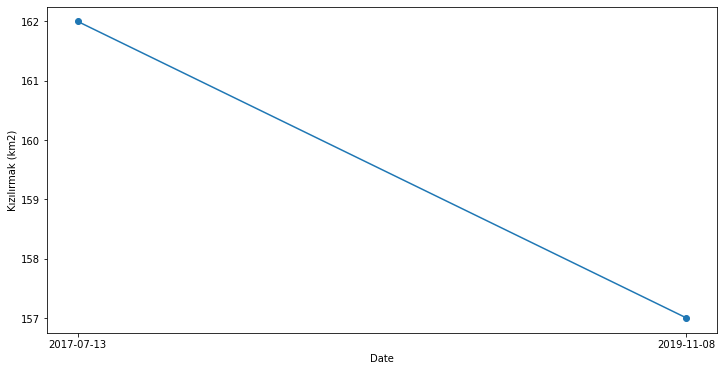

In [620]:
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib qt 

fig= plt.figure(figsize=(12,6)) #showing the difference of Kızılırmak in terms of km2 between to different years

x = dates.getInfo()
y = areas.getInfo()

plt.plot(x, y, marker='o')
plt.xlabel('Date')
plt.ylabel('Kızılırmak (km2)')
plt.show()

# Created a split-panel map to visualize results. The change between 2017 and 2019 can be easily observed by running the code below. 
On the left is the extracted water pixels from the images, on the right is the False color band combinations of the Images.

In [621]:
water_images = ndwi_images.map(lambda img: img.selfMask())
landsat_images = images

In [622]:
water_layer_names = ['Water ' + str(date) for date in x]

In [623]:
landsat_layer_names = ['Landsat ' + str(date) for date in x]

In [624]:
water_vis = {
    'palette': 'blue'
}

landsat_vis = {
  'bands': ['B5', 'B6', 'B4'],
  'min': 0,
  'max': 6000,
  'gamma': 1.4,
}

In [625]:
Map = geemap.Map()
Map.ts_inspector(left_ts=water_images, right_ts=landsat_images, left_names=water_layer_names, right_names=landsat_layer_names, left_vis=water_vis, right_vis=landsat_vis)
Map.centerObject(roi, zoom=8)
Map

Map(center=[41.264053, 34.858906999999995], controls=(WidgetControl(options=['position', 'transparent_bg'], wi…

# Exporting results to Google Drive

In [626]:
geemap.ee_export_image_collection_to_drive(water_images, folder='export', scale=90)

Total number of images: 2

Exporting LC08_176031_20170713 ...
Exporting LC08_176031_20191108 ...


In [627]:
geemap.ee_export_image_to_drive(occurrence.toInt(), description='water_occurrence', folder='export', region=first_ndwi_image
.geometry(), scale=90)

Exporting water_occurrence ...
